#  Project: Soccer database Analysis code

**This notebook covers only the code for the analysis, Insights and conclusion are in a seperate PDF file.**

## Table of Contents
<ul> 
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

In [1]:
#Import tools
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('darkgrid')

### Reading data

In [14]:
def sqlite_to_csv(db_path):
    try:
        db_cnx = sqlite3.connect(db_path)
    except sqlite3.ERROR as e:
        print(e)
    #fetch table names from db
    cursor = cnx.cursor()
    cursor.execute('SELECT name FROM sqlite_master WHERE type="table"; ')
    tables = cursor.fetchall()
    #to_csv
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query(f'SELECT * FROM {table_name}', db_cnx)
        table.to_csv(f'data/{table_name}.csv', index=False)
        print(f'{table_name} is saved as csv')
    cursor.close()
    db_cnx.close()

In [15]:
#Load data from sqlite database and convert tables to csv files

#path to db file assuming dataset and notebook are in the same directory
db_path = 'data/database.sqlite'

sqlite_to_csv(db_path)

sqlite_sequence is saved as csv
Player_Attributes is saved as csv
Player is saved as csv
Match is saved as csv
League is saved as csv
Country is saved as csv
Team is saved as csv
Team_Attributes is saved as csv


In [2]:
#read csv files
player_att_df = pd.read_csv('data/Player_Attributes.csv')
player_df = pd.read_csv('data/Player.csv')
match_df = pd.read_csv('data/Match.csv')
league_df = pd.read_csv('data/League.csv')
country_df = pd.read_csv('data/Country.csv')
team_df = pd.read_csv('data/Team.csv')
team_att_df = pd.read_csv('data/Team_Attributes.csv')

### Assessing data (only the tables we are going to use)

In [3]:
player_att_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
player_att_df.shape

(183978, 42)

In [5]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [6]:
player_df.shape

(11060, 7)

In [7]:
team_att_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [8]:
team_att_df.shape

(1458, 25)

In [9]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [10]:
team_df.shape

(299, 5)

In [11]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [12]:
match_df.shape

(25979, 115)

In [13]:
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [14]:
league_df.shape

(11, 3)

**Combine match and league in one df**

In [3]:
match_merged_df = pd.merge(match_df, league_df,left_on='league_id',right_on='id')
match_merged_df.rename(columns={'name':'league'}, inplace=True)
match_merged_df.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,country_id_y,league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,1,Belgium Jupiler League


In [4]:
match_merged_df.shape

(25979, 118)

**Combining team data in one df**

In [5]:
team_merged_df = pd.merge(team_df, team_att_df,on='team_api_id')
team_merged_df.rename(columns={'team_api_id':'team_id'}, inplace=True)
team_merged_df.head()

,id_x,team_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22 00:00:00,66,Balanced,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22 00:00:00,53,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,673,2013-09-20 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,673,2014-09-19 00:00:00,58,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [6]:
team_merged_df.shape

(1458, 29)

**Combining player data in one df**

In [7]:
player_merged_df = pd.merge(player_df, player_att_df,on='player_api_id')
player_merged_df.rename(columns={'player_api_id':'player_id'}, inplace=True)
player_merged_df.head()

,id_x,player_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,2015-03-20 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,2007-02-22 00:00:00,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
player_merged_df.shape

(183978, 48)

### Cleaning data

In [9]:
#for simplicity we change the name to team data
team_data =  team_merged_df.copy()
player_data = player_merged_df.copy()
match_data = match_merged_df.copy()

**team dataframe**

In [10]:
team_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_x                            1458 non-null   int64  
 1   team_id                         1458 non-null   int64  
 2   team_fifa_api_id_x              1458 non-null   float64
 3   team_long_name                  1458 non-null   object 
 4   team_short_name                 1458 non-null   object 
 5   id_y                            1458 non-null   int64  
 6   team_fifa_api_id_y              1458 non-null   int64  
 7   date                            1458 non-null   object 
 8   buildUpPlaySpeed                1458 non-null   int64  
 9   buildUpPlaySpeedClass           1458 non-null   object 
 10  buildUpPlayDribbling            489 non-null    float64
 11  buildUpPlayDribblingClass       1458 non-null   object 
 12  buildUpPlayPassing              14

In [11]:
#drop unnecessary columns
cols_to_drop = ['id_x', 'team_fifa_api_id_x', 'id_y', 'team_fifa_api_id_y']
team_data.drop(columns=cols_to_drop, axis=1,inplace=True)

team_data.head()

,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,NaN,Little,45,Mixed,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,NaN,Little,52,Mixed,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,NaN,Little,55,Mixed,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,NaN,Little,38,Mixed,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,52.0,Normal,38,Mixed,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [12]:
team_data.isnull().sum()

team_id                             0
team_long_name                      0
team_short_name                     0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [13]:
#drop missing rows with values
team_data.dropna(inplace=True)
team_data.isnull().sum().any()

False

In [14]:
#check for duplicated data
print('duplicated row count: ',team_data.duplicated().sum())

duplicated row count:  1


In [16]:
#Dedupe
team_data.drop_duplicates(inplace=True)
print('duplicated row count: ',team_data.duplicated().sum())

duplicated row count:  0


In [17]:
#check data types
team_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 4 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_id                         488 non-null    int64  
 1   team_long_name                  488 non-null    object 
 2   team_short_name                 488 non-null    object 
 3   date                            488 non-null    object 
 4   buildUpPlaySpeed                488 non-null    int64  
 5   buildUpPlaySpeedClass           488 non-null    object 
 6   buildUpPlayDribbling            488 non-null    float64
 7   buildUpPlayDribblingClass       488 non-null    object 
 8   buildUpPlayPassing              488 non-null    int64  
 9   buildUpPlayPassingClass         488 non-null    object 
 10  buildUpPlayPositioningClass     488 non-null    object 
 11  chanceCreationPassing           488 non-null    int64  
 12  chanceCreationPassingClass      488

In [19]:
team_data.date = pd.to_datetime(team_data.date, infer_datetime_format=True)
team_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 4 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   team_id                         488 non-null    int64         
 1   team_long_name                  488 non-null    object        
 2   team_short_name                 488 non-null    object        
 3   date                            488 non-null    datetime64[ns]
 4   buildUpPlaySpeed                488 non-null    int64         
 5   buildUpPlaySpeedClass           488 non-null    object        
 6   buildUpPlayDribbling            488 non-null    float64       
 7   buildUpPlayDribblingClass       488 non-null    object        
 8   buildUpPlayPassing              488 non-null    int64         
 9   buildUpPlayPassingClass         488 non-null    object        
 10  buildUpPlayPositioningClass     488 non-null    object        
 11  chanc

**player dataframe**

In [20]:
#drop unnecessary columns
cols_to_drop = ['id_x', 'player_fifa_api_id_x', 'id_y', 'player_fifa_api_id_y']
player_data.drop(columns=cols_to_drop, axis=1,inplace=True)

player_data.head()

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
#check for missing rows
player_data.isnull().sum()

player_id                 0
player_name               0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties           

In [22]:
#drop missing rows with values
player_data.dropna(inplace=True)
player_data.isnull().sum().any()

False

In [23]:
#check for duplicated data
print('duplicated row count: ',player_data.duplicated().sum())

duplicated row count:  0


In [24]:
#check date types
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_id            180354 non-null  int64  
 1   player_name          180354 non-null  object 
 2   birthday             180354 non-null  object 
 3   height               180354 non-null  float64
 4   weight               180354 non-null  int64  
 5   date                 180354 non-null  object 
 6   overall_rating       180354 non-null  float64
 7   potential            180354 non-null  float64
 8   preferred_foot       180354 non-null  object 
 9   attacking_work_rate  180354 non-null  object 
 10  defensive_work_rate  180354 non-null  object 
 11  crossing             180354 non-null  float64
 12  finishing            180354 non-null  float64
 13  heading_accuracy     180354 non-null  float64
 14  short_passing        180354 non-null  float64
 15  volleys          

In [25]:
#convert types
player_data.date = pd.to_datetime(player_data.date, infer_datetime_format=True)
player_data.birthday = pd.to_datetime(player_data.birthday, infer_datetime_format=True)
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_id            180354 non-null  int64         
 1   player_name          180354 non-null  object        
 2   birthday             180354 non-null  datetime64[ns]
 3   height               180354 non-null  float64       
 4   weight               180354 non-null  int64         
 5   date                 180354 non-null  datetime64[ns]
 6   overall_rating       180354 non-null  float64       
 7   potential            180354 non-null  float64       
 8   preferred_foot       180354 non-null  object        
 9   attacking_work_rate  180354 non-null  object        
 10  defensive_work_rate  180354 non-null  object        
 11  crossing             180354 non-null  float64       
 12  finishing            180354 non-null  float64       
 13  heading_accura

**match dataframe**

In [36]:
match_data.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,country_id_y,league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,1,Belgium Jupiler League


In [26]:
#drop unnecessary columns
cols_to_drop = ['id_x', 'country_id_x', 'league_id', 'match_api_id', 'id_y', 'country_id_y']
match_data.drop(columns=cols_to_drop, axis=1,inplace=True)
match_data.head()

,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league
0,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1,NaN,NaN,NaN,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League
1,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0,NaN,NaN,NaN,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League
2,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3,NaN,NaN,NaN,...,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League
3,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0,NaN,NaN,NaN,...,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League
4,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3,NaN,NaN,NaN,...,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League


In [27]:
#check for missing row
match_data.isnull().sum()

season                  0
stage                   0
date                    0
home_team_api_id        0
away_team_api_id        0
                    ...  
GBA                 11817
BSH                 11818
BSD                 11818
BSA                 11818
league                  0
Length: 112, dtype: int64

In [28]:
#drop missing rows with values
match_data.dropna(inplace=True)
match_data.isnull().sum().any()

False

In [29]:
#check for duplicated data
print('duplicated row count: ',match_data.duplicated().sum())

duplicated row count:  0


In [30]:
#check for data types
match_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 3248 to 23416
Data columns (total 112 columns):
 #   Column            Dtype  
---  ------            -----  
 0   season            object 
 1   stage             int64  
 2   date              object 
 3   home_team_api_id  int64  
 4   away_team_api_id  int64  
 5   home_team_goal    int64  
 6   away_team_goal    int64  
 7   home_player_X1    float64
 8   home_player_X2    float64
 9   home_player_X3    float64
 10  home_player_X4    float64
 11  home_player_X5    float64
 12  home_player_X6    float64
 13  home_player_X7    float64
 14  home_player_X8    float64
 15  home_player_X9    float64
 16  home_player_X10   float64
 17  home_player_X11   float64
 18  away_player_X1    float64
 19  away_player_X2    float64
 20  away_player_X3    float64
 21  away_player_X4    float64
 22  away_player_X5    float64
 23  away_player_X6    float64
 24  away_player_X7    float64
 25  away_player_X8    float64
 26  away_player_X9 

In [31]:
#convert types
match_data.date = pd.to_datetime(match_data.date, infer_datetime_format=True)

In [38]:
match_data.to_csv('data/match_data.csv',date_format='%Y%m%d', index=False)
player_data.to_csv('data/player_data.csv',date_format='%Y%m%d', index=False)
team_data.to_csv('data/team_data.csv',date_format='%Y%m%d', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [2]:
team_df = pd.read_csv('data/team_data.csv', parse_dates=['date'])
player_df = pd.read_csv('data/player_data.csv', parse_dates=['date','birthday'])
match_df = pd.read_csv('data/match_data.csv', parse_dates=['date'])

### Research Question 1 (Lionel Messi's performance over the years?)

In [54]:
messi_df = player_df.query('player_name.str.contains("Messi")').sort_values(by=['date'])
messi_df.head()

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
100491,30981,Lionel Messi,1987-06-24,170.18,159,2007-02-22,85.0,94.0,left,high,...,91.0,87.0,20.0,25.0,20.0,8.0,9.0,79.0,12.0,16.0
100490,30981,Lionel Messi,1987-06-24,170.18,159,2007-08-30,86.0,93.0,left,high,...,91.0,87.0,20.0,25.0,20.0,8.0,20.0,79.0,20.0,20.0
100489,30981,Lionel Messi,1987-06-24,170.18,159,2008-08-30,90.0,95.0,left,high,...,91.0,89.0,20.0,25.0,20.0,8.0,20.0,79.0,20.0,20.0
100488,30981,Lionel Messi,1987-06-24,170.18,159,2009-02-22,90.0,95.0,left,high,...,91.0,91.0,20.0,25.0,20.0,8.0,20.0,79.0,20.0,20.0
100487,30981,Lionel Messi,1987-06-24,170.18,159,2009-08-30,90.0,95.0,left,high,...,91.0,91.0,20.0,21.0,20.0,8.0,20.0,75.0,20.0,20.0


In [128]:
data = messi_df.groupby(messi_df.date.dt.year).mean()
data

,player_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
date,,,,,,,,,,,,,,,,,,,,,
2007,30981,170.18,159,85.500000,93.500000,84.000000,78.000000,61.0,88.000000,88.000000,...,91.0,87.000000,20.000000,25.000000,20.000000,8.0,14.5,79.0,16.0,18.0
2008,30981,170.18,159,90.000000,95.000000,81.000000,87.000000,64.0,90.000000,88.000000,...,91.0,89.000000,20.000000,25.000000,20.000000,8.0,20.0,79.0,20.0,20.0
2009,30981,170.18,159,90.000000,95.000000,81.500000,88.500000,64.0,88.500000,88.000000,...,91.0,91.000000,20.000000,23.000000,20.000000,8.0,20.0,77.0,20.0,20.0
2010,30981,170.18,159,90.000000,94.500000,83.500000,90.500000,67.5,89.000000,88.000000,...,91.0,88.500000,16.500000,21.000000,20.000000,7.0,15.5,45.0,17.0,14.0
2011,30981,170.18,159,92.000000,95.000000,85.000000,92.000000,69.0,89.000000,89.500000,...,90.0,86.000000,13.000000,21.000000,20.000000,6.0,11.0,15.0,14.0,8.0
2012,30981,170.18,159,94.000000,96.000000,85.000000,94.000000,73.0,89.000000,89.500000,...,90.0,77.000000,13.000000,21.000000,20.000000,6.0,11.0,15.0,14.0,8.0
2013,30981,170.18,159,94.000000,97.000000,84.000000,97.000000,71.6,89.000000,89.400000,...,90.0,77.200000,17.800000,21.000000,20.000000,6.0,11.0,15.0,14.0,8.0
2014,30981,170.18,159,93.333333,95.666667,84.000000,95.000000,71.0,89.000000,86.666667,...,90.0,76.000000,25.000000,21.000000,20.000000,6.0,11.0,15.0,14.0,8.0
2015,30981,170.18,159,93.428571,94.428571,82.285714,93.571429,71.0,88.571429,85.000000,...,90.0,74.571429,19.857143,21.857143,20.428571,6.0,11.0,15.0,14.0,8.0


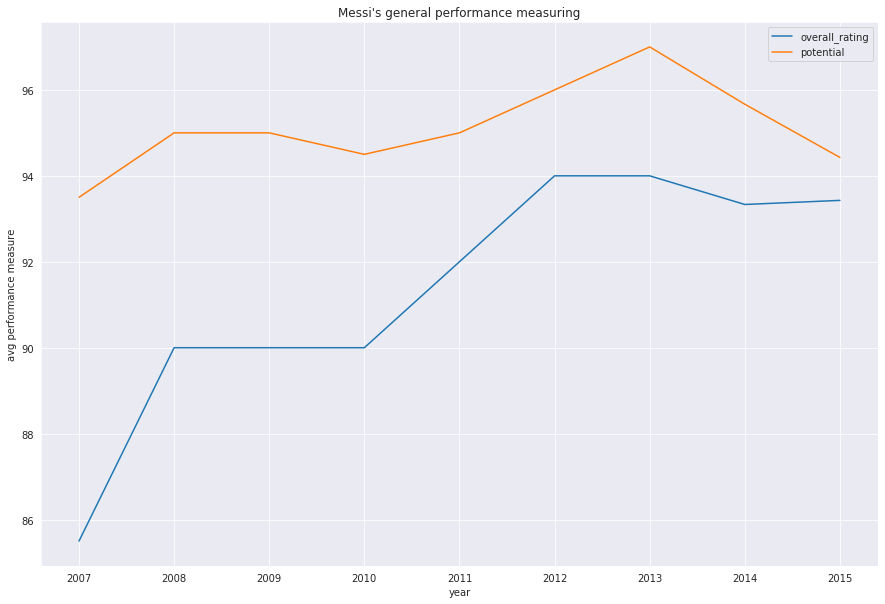

In [156]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data.index, y=data.overall_rating, label='overall_rating')
sns.lineplot(x=data.index, y=data.potential, label='potential')
plt.title('Messi\'s general performance measuring')
plt.ylabel('avg performance measure')
plt.xlabel('year')
plt.legend()
plt.show()

As expected the average overall_rating per year of Lionel Messi has improved by 9.2%

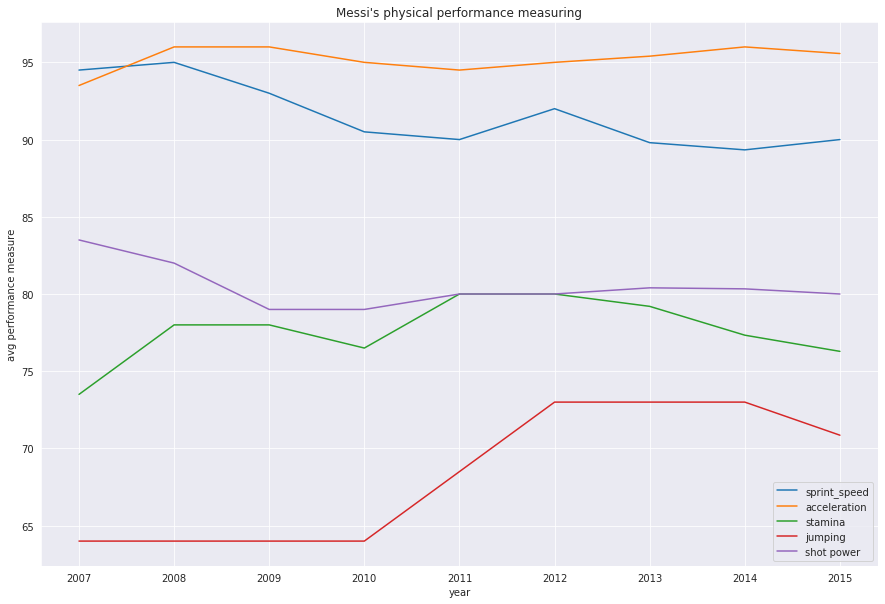

In [155]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data.index, y=data.sprint_speed, label='sprint_speed')
sns.lineplot(x=data.index, y=data.acceleration, label='acceleration')
sns.lineplot(x=data.index, y=data.stamina, label='stamina')
sns.lineplot(x=data.index, y=data.jumping, label='jumping')
sns.lineplot(x=data.index, y=data.shot_power, label='shot power')
plt.title('Messi\'s physical performance measuring')
plt.ylabel('avg performance measure')
plt.xlabel('year')
plt.legend()
plt.show()

Acceleration and sprint_speed: Since Messi is relatively short and fit, his acceleration is an important key factor which depends on small periods of top speed, unlike sprint speed which decreases with aging.

Stamina: This metric is related to the physical condition and it has seen the most peek between 2011-2012.

Jumping: Jumping has tremendously improved since 2010 and starts decreasing since 2014

Shot power: Shot power has decreased and was stable from 2009, since his play style doesn't depend on shooting

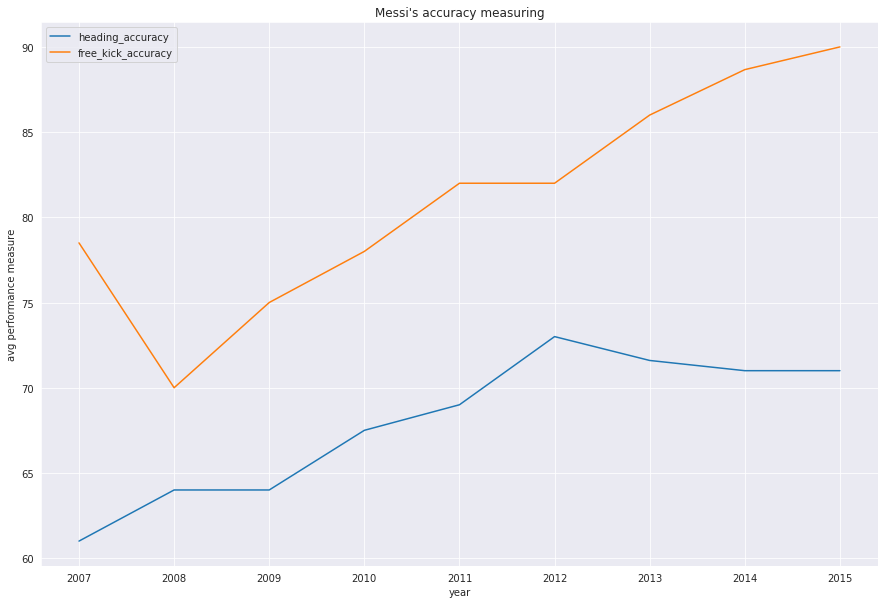

In [154]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data.index, y=data.heading_accuracy, label='heading_accuracy')
sns.lineplot(x=data.index, y=data.free_kick_accuracy, label='free_kick_accuracy')
plt.title('Messi\'s accuracy measuring')
plt.ylabel('avg performance measure')
plt.xlabel('year')
plt.legend()
plt.show()

Free kick accuracy: Free kick accuracy improved over the years, reaching its highest in 2015

Heading accuracy: Like overall performance, heading accuracy improved to reach its peek in 2012 and then starts decreasing.

### Research Question 2  (Who's better, right or left-footed players?)

In [11]:
player_df.head()

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1992-02-29,182.88,187,2016-02-18,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-11-19,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-09-21,62.0,66.0,right,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,1992-02-29,182.88,187,2015-03-20,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,1992-02-29,182.88,187,2007-02-22,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [25]:
data = player_df.groupby(['preferred_foot']).mean()
data

,player_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
preferred_foot,,,,,,,,,,,,,,,,,,,,,
left,139404.072959,181.048093,166.858526,68.652822,73.520099,60.417530,49.560387,57.401478,64.312603,49.860136,...,58.917315,55.383930,50.309860,53.798422,51.753758,12.490806,13.785045,18.881606,13.877843,14.052939
right,137086.320873,182.146525,169.394878,68.629651,73.466300,53.434255,50.092193,57.218801,61.895638,49.368757,...,57.528540,54.787614,45.607412,49.239029,46.823644,15.410791,16.647926,21.058739,16.706915,17.060941


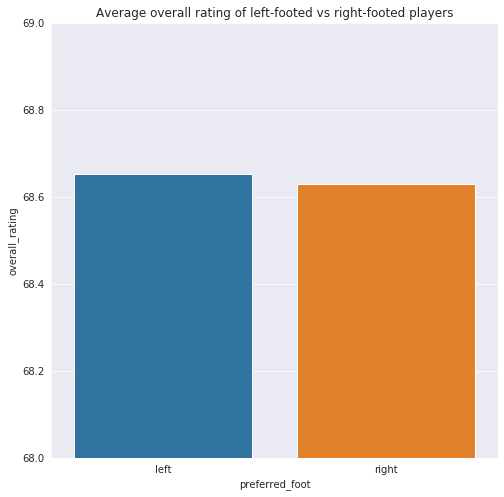

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(x=data.index, y=data.overall_rating)
plt.title('Average overall rating of left-footed vs right-footed players')
plt.ylim((68,69))
plt.show()

According to the previous plot, the left-footed average players overall rating between 2007 and 2015 is slightly better (by ~0.03).

The ylim was modified on purpose in this plot to be able to notice a small difference within large values.
I found this answer in quora as answer to my action:
>Starting an axis at a non-zero number is perfectly acceptable. This is called an offset.. Pick one that keeps all your data displayed on the graph.

### Which are the most winning teams in 2012/2013 season ?

In [5]:
match_df.head()

,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league,winner
0,2012/2013,1,2012-08-18,9825,8472,0,0,1.0,2.0,4.0,...,4.75,8.50,1.35,4.60,9.00,1.40,4.33,8.50,England Premier League,0
1,2012/2013,1,2012-08-20,8668,10260,1,0,1.0,2.0,4.0,...,3.70,1.87,4.60,3.50,1.83,4.00,3.40,1.91,England Premier League,1
2,2012/2013,1,2012-08-18,9879,9850,5,0,1.0,2.0,4.0,...,3.75,4.75,1.80,3.50,4.40,1.83,3.50,4.33,England Premier League,1
3,2012/2013,1,2012-08-19,8456,8466,3,2,1.0,2.0,4.0,...,7.00,19.00,1.18,6.25,16.00,1.17,6.50,17.00,England Premier League,1
4,2012/2013,1,2012-08-18,10261,8586,2,1,1.0,2.0,4.0,...,3.40,2.75,2.60,3.30,2.75,2.50,3.40,2.70,England Premier League,1


In [4]:
#Define winner method to determine who won the game based on goals
##winner 1 if home_team won, 2 if away_team won and 0 if null
def winner(row):
    if row['home_team_goal'] > row['away_team_goal']:
        val = 1
    elif row['home_team_goal'] < row['away_team_goal']:
        val = 2
    else:
        val = 0
    return val
match_df['winner'] = match_df.apply(winner, axis=1)
match_df.winner

0       0
1       1
2       1
3       1
4       1
       ..
1757    1
1758    1
1759    2
1760    0
1761    2
Name: winner, Length: 1762, dtype: int64

In [38]:
#Determine the home team with the most winns
home_team_data = match_df.query('winner == 1').groupby(['home_team_api_id'])['winner'].count()

home_team_api_id
4087     2
7794     9
7878     6
8165     7
8178    12
Name: winner, dtype: int64

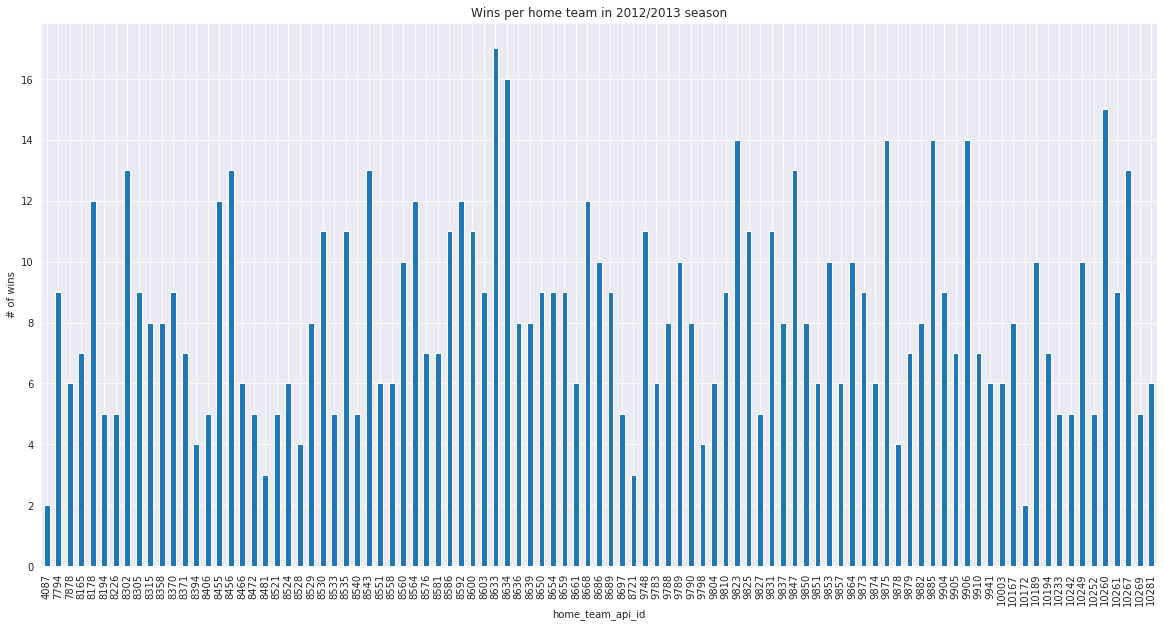

In [60]:
home_team_data.plot(figsize=(20,10), kind='bar')
plt.title('Wins per home team in 2012/2013 season')
plt.ylabel('# of wins')
plt.show()

We can see that the number of wins per home team is betwwen 2 and 17, however we're only intrested in extracting the the team with the **most wins (home_team_ai_id: 8633)**

In [50]:
#determine the most winner
home_max_wins = home_team_data.max()
hw_id = home_team_data.index[home_team_data.argmax()]
hw_id, home_max_wins

(8633, 17)

In [51]:
#get the winner's name
home_name = team_df.query('team_id == @hw_id ')['team_long_name'].iloc[0]
home_name

'Real Madrid CF'

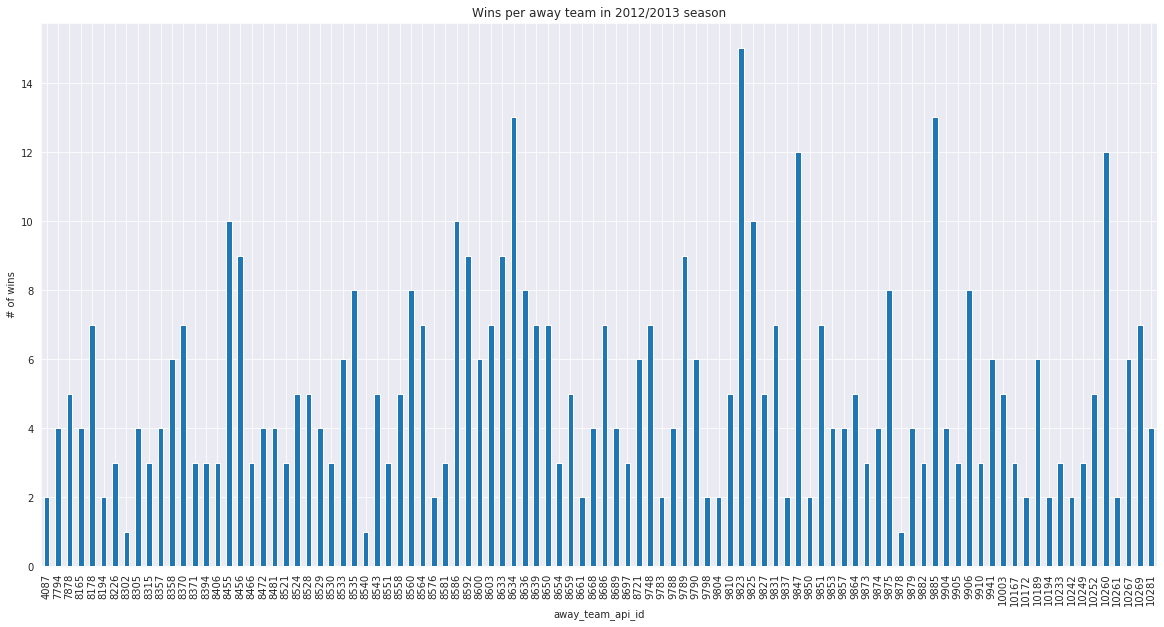

In [61]:
#Determine the away team with the most wins
away_team_data = match_df.query('winner == 2').groupby(['away_team_api_id'])['winner'].count()
away_team_data.plot(figsize=(20,10), kind='bar')
plt.title('Wins per away team in 2012/2013 season')
plt.ylabel('# of wins')
plt.show()

We can see that the number of wins per away team is betwwen 1 and 15, however we're only intrested in extracting the the team with the most wins (home_team_ai_id: 9823)

In [52]:
#determine the most winner
away_max_wins = away_team_data.max()
aw_id = away_team_data.index[away_team_data.argmax()]
aw_id

9823

In [53]:
#get the winner's name
away_name = team_df.query('team_id == @aw_id ')['team_long_name'].iloc[0]
away_name

'FC Bayern Munich'

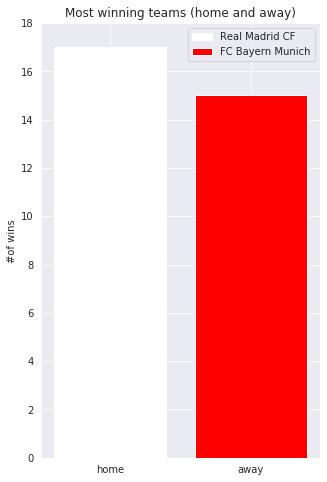

In [56]:
plt.figure(figsize=(5,8))
levels = [1, 2]
labels = ['home', 'away']
heights = [home_max_wins, away_max_wins]
ax = plt.bar(levels, heights, tick_label=labels, color=['white','red'])
plt.legend(ax[:2],[home_name, away_name])
plt.ylim((0,18))
plt.title('Most winning teams (home and away)')
plt.ylabel('#of wins')
plt.show()

### Question 4: Which league has the most goals in the 2012/2013 season ?

In [81]:
#Number of goals per league
goal_data = match_df.groupby('league')['home_team_goal','away_team_goal'].sum()

/home/zowlex/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [86]:
goal_data['total_goals'] = data.home_team_goal + data.away_team_goal
goal_data.sort_values(by=['total_goals'],inplace=True)
goal_data

,home_team_goal,away_team_goal,total_goals
league,,,
France Ligue 1,513,382,895
Germany 1. Bundesliga,487,410,897
Italy Serie A,553,414,967
Spain LIGA BBVA,615,426,1041
England Premier League,586,468,1054


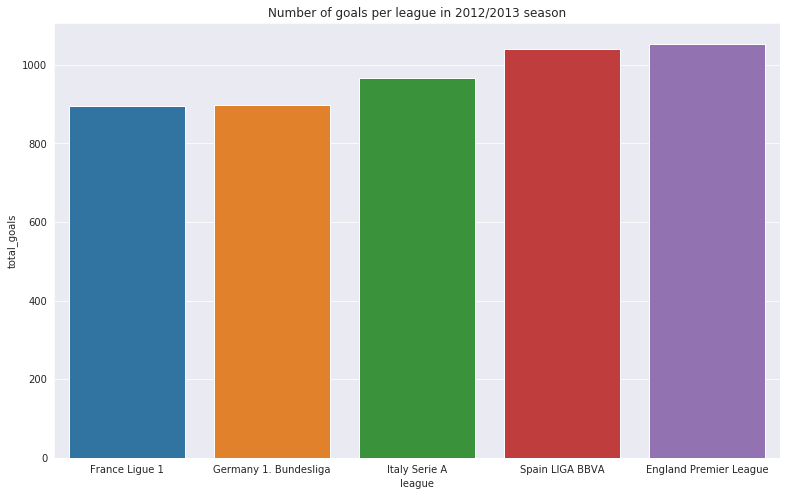

In [85]:
plt.figure(figsize=(13,8))
sns.barplot(x=goal_data.index, y=goal_data.total_goals)
plt.title('Number of goals per league in 2012/2013 season')
plt.show()

Number of goals per league is between 895 and 1054, however we're trying to get the league with the most goals which is **England premier league**